# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')
from pyod.models.abod import ABOD
from pyod.models.knn import KNN

# Dataset 

In [2]:
data = pd.read_csv('body.csv', dtype={'stop_name': 'str','daytime_routes': 'str','division':'str','line':'str','complex_id':'str'})

In [3]:
data

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
0,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-01,5812.0,6659.0
1,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-02,15506.0,14307.0
2,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-03,15959.0,14500.0
3,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-04,9265.0,9161.0
4,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-05,7191.0,7743.0
...,...,...,...,...,...,...,...,...,...,...,...,...
159528,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068633,40.730304,R552,2020-12-21,9116.0,10446.0
159529,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068633,40.730304,R552,2020-12-22,9225.0,10445.0
159530,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068633,40.730304,R552,2020-12-23,9361.0,8109.0
159531,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068633,40.730304,R552,2020-12-24,7652.0,6975.0


# Data Cleansing

In [4]:
# Identifying Null Values in the dataset
data.isnull()

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
159528,False,True,False,True,True,True,False,False,False,False,False,False
159529,False,True,False,True,True,True,False,False,False,False,False,False
159530,False,True,False,True,True,True,False,False,False,False,False,False
159531,False,True,False,True,True,True,False,False,False,False,False,False


In [5]:
#Total number of null values in each column.
data.isnull().sum()

stop_name          116
daytime_routes    6236
division           116
line              6236
borough           6236
structure         6236
gtfs_longitude     116
gtfs_latitude      116
complex_id           0
date                 0
entries             23
exits               23
dtype: int64

In [6]:
# Dropping null values from dataset,dropna() drop all rows with null values.
cd = data.dropna()
cd

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
0,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-01,5812.0,6659.0
1,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-02,15506.0,14307.0
2,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-03,15959.0,14500.0
3,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-04,9265.0,9161.0
4,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-05,7191.0,7743.0
...,...,...,...,...,...,...,...,...,...,...,...,...
153292,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-21,1771.0,1842.0
153293,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-22,1775.0,1783.0
153294,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-23,1767.0,1860.0
153295,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-24,1465.0,1545.0


In [7]:
#Modifying dateset by removing extra spaces and dashes.
cd.stop_name=cd.stop_name.str.replace('-','').fillna(cd.stop_name)

In [8]:
#A new dataframe, A cleaned dataframe 
cd

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
0,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-01,5812.0,6659.0
1,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-02,15506.0,14307.0
2,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-03,15959.0,14500.0
3,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-04,9265.0,9161.0
4,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-05,7191.0,7743.0
...,...,...,...,...,...,...,...,...,...,...,...,...
153292,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-21,1771.0,1842.0
153293,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-22,1775.0,1783.0
153294,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-23,1767.0,1860.0
153295,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-24,1465.0,1545.0


<Figure size 1440x288 with 0 Axes>

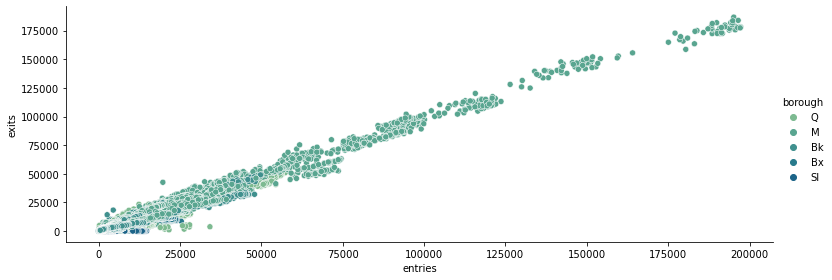

In [9]:
#Identifying the outliers in dataset.
sns.set_palette(sns.color_palette("crest"))
plt.figure(figsize=(20,4))
x = cd['entries']
y = cd['exits']
sns.relplot(data=cd, x=x, y=y, kind="scatter", hue="borough",aspect=11.7/4.27, height=4)

# Angled Based Outlier Detection ABOD

In [10]:
abod_model = ABOD(contamination=0.5, method='fast', n_neighbors=10)
abod_model.fit(cd[['entries','exits']])

ABOD(contamination=0.5, method='fast', n_neighbors=10)

In [11]:
cd['entries_ABOD'] = abod_model.decision_function(cd[['entries','exits']])

In [12]:
cd['anomaly_ABOD'] = abod_model.predict(cd[['entries','exits']])
cd

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits,entries_ABOD,anomaly_ABOD
0,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-01,5812.0,6659.0,-6.212238e-08,0
1,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-02,15506.0,14307.0,-6.524665e-09,0
2,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-03,15959.0,14500.0,-3.804586e-10,0
3,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-04,9265.0,9161.0,-1.284716e-08,0
4,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-05,7191.0,7743.0,-2.564345e-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153292,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-21,1771.0,1842.0,-2.997675e-04,0
153293,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-22,1775.0,1783.0,-3.207254e-03,0
153294,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-23,1767.0,1860.0,-1.304666e-03,0
153295,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-24,1465.0,1545.0,-3.981888e-04,0


In [13]:
cd[cd['anomaly_ABOD']==0]

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits,entries_ABOD,anomaly_ABOD
0,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-01,5812.0,6659.0,-6.212238e-08,0
1,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-02,15506.0,14307.0,-6.524665e-09,0
2,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-03,15959.0,14500.0,-3.804586e-10,0
3,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-04,9265.0,9161.0,-1.284716e-08,0
4,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-05,7191.0,7743.0,-2.564345e-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153292,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-21,1771.0,1842.0,-2.997675e-04,0
153293,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-22,1775.0,1783.0,-3.207254e-03,0
153294,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-23,1767.0,1860.0,-1.304666e-03,0
153295,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-24,1465.0,1545.0,-3.981888e-04,0


In [14]:
total_outliers = len(cd[cd['anomaly_ABOD']!=0])

In [15]:
total_outliers

0

In [16]:
total_inliers = len(cd[cd['anomaly_ABOD']==0])

In [17]:
total_inliers

153277

<AxesSubplot:xlabel='anomaly_ABOD', ylabel='Density'>

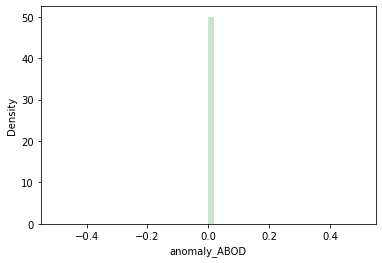

In [18]:
sns.distplot(cd['anomaly_ABOD'])

# K-Nearest Neighbours KNN 

In [19]:
from pyod.models.knn import KNN

In [20]:
knn_model = KNN(contamination = 0.5)

In [21]:
knn_model.fit(cd[['entries','exits']])

KNN(algorithm='auto', contamination=0.5, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [22]:
cd['entries_KNN'] = knn_model.decision_function(cd[['entries','exits']])

In [23]:
cd['anomaly_knn'] = knn_model.predict(cd[['entries','exits']])

In [24]:
cd

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits,entries_ABOD,anomaly_ABOD,entries_KNN,anomaly_knn
0,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-01,5812.0,6659.0,-6.212238e-08,0,60.406953,1
1,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-02,15506.0,14307.0,-6.524665e-09,0,198.297756,1
2,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-03,15959.0,14500.0,-3.804586e-10,0,191.783732,1
3,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-04,9265.0,9161.0,-1.284716e-08,0,96.607453,1
4,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-05,7191.0,7743.0,-2.564345e-07,0,44.553339,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153292,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-21,1771.0,1842.0,-2.997675e-04,0,8.246211,0
153293,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-22,1775.0,1783.0,-3.207254e-03,0,6.082763,0
153294,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-23,1767.0,1860.0,-1.304666e-03,0,7.000000,0
153295,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-24,1465.0,1545.0,-3.981888e-04,0,8.246211,0


In [25]:
total_outliers_ = len(cd[cd['anomaly_knn']==1])

In [26]:
total_outliers_

69931

In [27]:
total_inliers_ = len(cd[cd['anomaly_knn']==0])

In [28]:
total_inliers_

83346

<AxesSubplot:xlabel='anomaly_knn', ylabel='Density'>

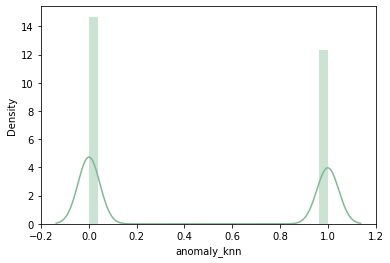

In [29]:
sns.distplot(cd['anomaly_knn'])

# Cluster-based Local Outlier Factor CBLOF 

In [30]:
from pyod.models.cblof import CBLOF

In [31]:
cblof_model = CBLOF(contamination = 0.5)

In [32]:
cblof_model.fit(cd[['entries','exits']])

CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.5, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False)

In [33]:
cd['Score_CBLOF'] = cblof_model.decision_function(cd[['entries','exits']])

In [34]:
cd['Anomaly_CBLOF'] = cblof_model.predict(cd[['entries','exits']])

In [35]:
cd

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits,entries_ABOD,anomaly_ABOD,entries_KNN,anomaly_knn,Score_CBLOF,Anomaly_CBLOF
0,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-01,5812.0,6659.0,-6.212238e-08,0,60.406953,1,3142.912050,1
1,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-02,15506.0,14307.0,-6.524665e-09,0,198.297756,1,8252.612083,1
2,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-03,15959.0,14500.0,-3.804586e-10,0,191.783732,1,8714.373228,1
3,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-04,9265.0,9161.0,-1.284716e-08,0,96.607453,1,658.388330,0
4,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-05,7191.0,7743.0,-2.564345e-07,0,44.553339,1,2518.460946,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153292,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-21,1771.0,1842.0,-2.997675e-04,0,8.246211,0,868.685421,0
153293,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-22,1775.0,1783.0,-3.207254e-03,0,6.082763,0,824.571934,0
153294,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-23,1767.0,1860.0,-1.304666e-03,0,7.000000,0,880.870513,0
153295,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-24,1465.0,1545.0,-3.981888e-04,0,8.246211,0,453.110759,0


In [36]:
total_outliers_2 = len(cd[cd['Anomaly_CBLOF']==1])

In [37]:
total_outliers_2

76638

In [38]:
total_inliers_2 = len(cd[cd['Anomaly_CBLOF']==0])
total_inliers_2

76639

<AxesSubplot:xlabel='Anomaly_CBLOF', ylabel='Density'>

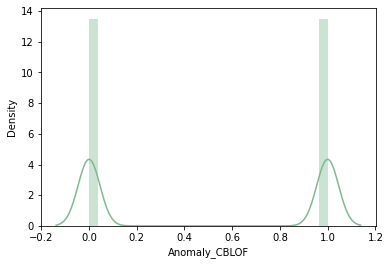

In [39]:
sns.distplot(cd['Anomaly_CBLOF'])

# Isolation Forest IForest

In [40]:
from pyod.models.iforest import IForest

In [41]:
iforest_model = IForest(contamination = 0.5)

In [42]:
iforest_model.fit(cd[['entries','exits']])

IForest(behaviour='old', bootstrap=False, contamination=0.5, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [43]:
cd['Score_iForest'] = iforest_model.decision_function(cd[['entries','exits']])

In [44]:
cd['Anomaly_iforest'] = iforest_model.predict(cd[['entries','exits']])

In [45]:
cd

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits,entries_ABOD,anomaly_ABOD,entries_KNN,anomaly_knn,Score_CBLOF,Anomaly_CBLOF,Score_iForest,Anomaly_iforest
0,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-01,5812.0,6659.0,-6.212238e-08,0,60.406953,1,3142.912050,1,0.081578,1
1,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-02,15506.0,14307.0,-6.524665e-09,0,198.297756,1,8252.612083,1,0.218980,1
2,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-03,15959.0,14500.0,-3.804586e-10,0,191.783732,1,8714.373228,1,0.218560,1
3,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-04,9265.0,9161.0,-1.284716e-08,0,96.607453,1,658.388330,0,0.118140,1
4,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-05,7191.0,7743.0,-2.564345e-07,0,44.553339,1,2518.460946,1,0.095648,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153292,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-21,1771.0,1842.0,-2.997675e-04,0,8.246211,0,868.685421,0,-0.012820,0
153293,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-22,1775.0,1783.0,-3.207254e-03,0,6.082763,0,824.571934,0,-0.013476,0
153294,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-23,1767.0,1860.0,-1.304666e-03,0,7.000000,0,880.870513,0,-0.011890,0
153295,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-24,1465.0,1545.0,-3.981888e-04,0,8.246211,0,453.110759,0,-0.018916,0


In [46]:
total_outliers_iforest = len(cd[cd['Anomaly_iforest']==1])

In [47]:
total_outliers_iforest

76638

In [48]:
total_inliers_iforest = len(cd[cd['Anomaly_iforest']==0])

In [49]:
total_inliers_iforest

76639

<AxesSubplot:xlabel='Anomaly_iforest', ylabel='Density'>

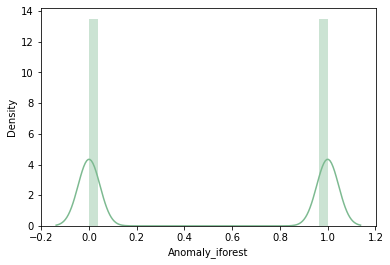

In [50]:
sns.distplot(cd['Anomaly_iforest'])